In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats
from sklearn.cluster import KMeans 
from sklearn import metrics 
from scipy.spatial.distance import cdist 
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn import tree
import graphviz
import os
os.environ["PATH"] += os.pathsep + 'F:/Data Analytics-MS!/Integrated Experiential Learn/Week 5 & 6/release/bin'
import warnings
warnings.filterwarnings('ignore')
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import recall_score
#from imblearn.over_sampling import SMOTE

G:\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
df1 = pd.read_csv('F:/Data Analytics-MS!/Integrated Experiential Learn/Week 5 & 6/indicator_pairs_data updated.csv')
df2 = pd.read_csv('F:/Data Analytics-MS!/Integrated Experiential Learn/Week 5 & 6/obfuscated_demo_data2.csv')

In [3]:
df = pd.merge(df1, df2, on='employee_id', how = 'inner')

In [4]:
df.shape

(132084, 23)

In [5]:
condition = df['alert_category']=='Atomic'
df = df[condition]

In [6]:
df.shape

(92594, 23)

In [7]:
print(df.isnull().sum())

alert_escalation_date       0
alert_id_fk                 0
insert_date                 0
score                       0
owner_name                105
employee_id                 0
risk_factor                 0
avg_score                   0
classification              0
hru                         0
alert_category              0
alert_type                  0
indicator_pairs             0
person_type                 0
person_status               0
ge_hire_date             1121
city                     1324
state_name                738
country_name              738
function_group            738
job_function                0
career_band                 0
industry_focus_name         0
dtype: int64


In [8]:
df['Dates'] = pd.to_datetime(df['ge_hire_date']).dt.date
df['Time'] = pd.to_datetime(df['ge_hire_date']).dt.time
df['year'] = pd.DatetimeIndex(df['Dates']).year
df['Tenure'] = df.apply(lambda row: 2020 - row.year, axis = 1) 
df['year'] = df['year'].fillna(0).astype(int)
df['Tenure'] = df['Tenure'].fillna(0).astype(int)

In [9]:
df = df.drop(['alert_id_fk', 'insert_date', 'employee_id', 'score', 'alert_escalation_date', 'ge_hire_date', 'city', 'state_name', 'country_name', 'alert_type', 'alert_category', 'risk_factor', 'avg_score', 'year', 'Time', 'Dates'], axis=1)

In [10]:
#export_csv = df.to_csv (r'F:\Data Analytics-MS!\Integrated Experiential Learn\Final Submissions\atomic_alerts.csv', index = None, header=True)

In [11]:
df_cl = df.copy()
df_cl2 = df.copy()

In [12]:
#df_cl['classification'] = np.where((df_cl['classification'] == 'TP/HIGH'), 1, 0)

In [13]:
#One-hot Encoding
df_cl = pd.get_dummies(df_cl)

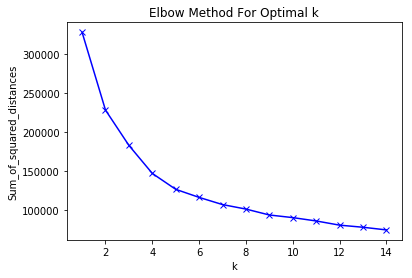

In [14]:
mms = MinMaxScaler()
mms.fit(df_cl)
data_transformed = mms.transform(df_cl)

Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(data_transformed)
    Sum_of_squared_distances.append(km.inertia_)

plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [15]:
kmeans = KMeans(n_clusters=4, random_state=0).fit(data_transformed)
labels = kmeans.labels_

df_cl['clusters'] = labels

kmeans_mean_cluster = pd.DataFrame(round(df_cl.groupby('clusters').sum()))
kmeans_mean_cluster
export_csv = kmeans_mean_cluster.to_csv (r'F:\Data Analytics-MS!\Integrated Experiential Learn\Final Submissions\clustering_atomic.csv', index = None, header=True)

In [33]:
df_cl['classification'].value_counts()

0    92371
1      223
Name: classification, dtype: int64

In [34]:
df_cl2['classification'] = np.where(((df_cl2['classification'] == 'TP/HIGH') | (df_cl2['classification'] == 'TP/LOW')), 1, 0)

In [36]:
#One-hot Encoding
df_cl2 = pd.get_dummies(df_cl2)

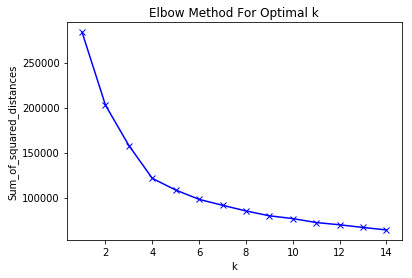

In [37]:
mms = MinMaxScaler()
mms.fit(df_cl2)
data_transformed = mms.transform(df_cl2)

Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(data_transformed)
    Sum_of_squared_distances.append(km.inertia_)

plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [38]:
kmeans = KMeans(n_clusters=4, random_state=0).fit(data_transformed)
labels = kmeans.labels_

df_cl2['clusters'] = labels

kmeans_mean_cluster = pd.DataFrame(round(df_cl2.groupby('clusters').mean(),1))
kmeans_mean_cluster

,classification,Tenure,owner_name_Analyst_1,owner_name_Analyst_4,owner_name_Analyst_5,owner_name_Analyst_6,owner_name_Analyst_7,owner_name_Analyst_8,owner_name_Senior_Analyst_1,owner_name_Senior_Analyst_2,...,industry_focus_name_BUSINESS_SEGMENT_11,industry_focus_name_BUSINESS_SEGMENT_12,industry_focus_name_BUSINESS_SEGMENT_15,industry_focus_name_BUSINESS_SEGMENT_2,industry_focus_name_BUSINESS_SEGMENT_3,industry_focus_name_BUSINESS_SEGMENT_4,industry_focus_name_BUSINESS_SEGMENT_6,industry_focus_name_BUSINESS_SEGMENT_7,industry_focus_name_BUSINESS_SEGMENT_8,industry_focus_name_BUSINESS_SEGMENT_9
clusters,,,,,,,,,,,,,,,,,,,,,
0,0.0,7.3,0.1,0.3,0.0,0.2,0.0,0.0,0.3,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.0,14.6,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.1,12.1,0.1,0.4,0.0,0.1,0.1,0.1,0.1,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 92594 entries, 0 to 132082
Data columns (total 11 columns):
owner_name             92489 non-null object
classification         92594 non-null object
hru                    92594 non-null object
indicator_pairs        92594 non-null object
person_type            92594 non-null object
person_status          92594 non-null object
function_group         91856 non-null object
job_function           92594 non-null object
career_band            92594 non-null object
industry_focus_name    92594 non-null object
Tenure                 92594 non-null int32
dtypes: int32(1), object(10)
memory usage: 8.1+ MB


In [48]:
dfcor = pd.DataFrame(df)
dfcor['owner_name'] =dfcor['owner_name'].astype('category').cat.codes
dfcor['hru'] =dfcor['hru'].astype('category').cat.codes
dfcor['indicator_pairs'] =dfcor['indicator_pairs'].astype('category').cat.codes
dfcor['person_type'] =dfcor['person_type'].astype('category').cat.codes
dfcor['person_status'] =dfcor['person_status'].astype('category').cat.codes
dfcor['function_group'] =dfcor['function_group'].astype('category').cat.codes
dfcor['job_function'] =dfcor['job_function'].astype('category').cat.codes
dfcor['career_band'] =dfcor['career_band'].astype('category').cat.codes
dfcor['industry_focus_name'] =dfcor['industry_focus_name'].astype('category').cat.codes
dfcor['classification'] =dfcor['classification'].astype('category').cat.codes

In [52]:
dfcor[dfcor.columns[:]].corr()['classification'][:]

owner_name            -0.588834
classification         1.000000
hru                    0.300345
indicator_pairs       -0.612988
person_type           -0.115224
person_status          0.167725
function_group        -0.231153
job_function          -0.416608
career_band           -0.058345
industry_focus_name   -0.054029
Tenure                 0.026826
Name: classification, dtype: float64

In [53]:
df_rf = df.copy()
df_rf2 = df.copy()

In [55]:
df_rf.head()

,owner_name,classification,hru,indicator_pairs,person_type,person_status,function_group,job_function,career_band,industry_focus_name,Tenure
0,7,1,1,24,1,0,3,18,1,7,14
1,7,1,1,24,1,0,3,18,1,7,14
2,7,1,1,24,1,0,3,18,1,7,14
3,7,1,1,24,1,0,3,18,1,7,14
4,7,1,1,24,1,0,3,18,1,7,14


In [58]:
#Using Indicators as well

#split dataset in features and target variable
feature_cols = ['score', 'owner_name', 'hru', 'person_type', 'person_status', 'alert_type', 'risk_factor', 'Tenure', 'indicator_pairs', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21']
X1 = df_rfc[feature_cols] # Features
y1 = df_rfc.classification #Target Variable

#One-hot Encoding
X1 = pd.get_dummies(X1)

#Splitting into training and testing sets
X_train1,X_test1,y_train1,y_test1 = train_test_split(X1,y1,test_size=0.25,random_state=0)

#Training the Algorithm
classifier1 = RandomForestClassifier(n_estimators=20, random_state=0)
classifier1.fit(X_train1, y_train1)
y_pred1 = classifier1.predict(X_test1)

print(confusion_matrix(y_test1,y_pred1))
print(classification_report(y_test1,y_pred1))
print(accuracy_score(y_test1, y_pred1))

NameError: name 'df_rfc' is not defined